<a href="https://colab.research.google.com/github/Cuong2812/Weather-Prediction/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prophet


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
gf = pd.read_csv('test.csv')
gf.head()

,date,max temp
0,1/1/2009,19
1,1/2/2009,18
2,1/3/2009,20
3,1/4/2009,25
4,1/5/2009,23


In [ ]:
gf['date'] = pd.to_datetime(gf['date'])
data = gf 
data.columns = ['ds', 'y'] 
data.head()

,ds,y
0,2009-01-01,19
1,2009-01-02,18
2,2009-01-03,20
3,2009-01-04,25
4,2009-01-05,23


In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.1,shuffle=False)
len(test)


455

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsax41mzs/l40ji4h2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsax41mzs/edwuj4p9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23709', 'data', 'file=/tmp/tmpsax41mzs/l40ji4h2.json', 'init=/tmp/tmpsax41mzs/edwuj4p9.json', 'output', 'file=/tmp/tmpsax41mzs/prophet_modelppyvtis4/prophet_model-20230323010000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


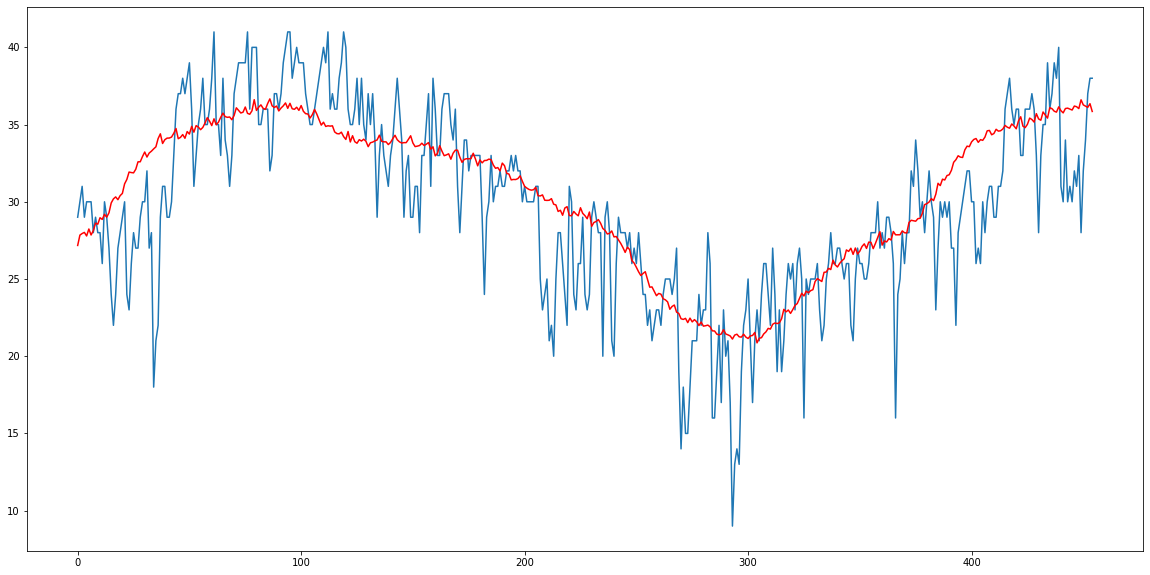

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet(daily_seasonality=True)
model.fit(train)
forecasts = model.make_future_dataframe(periods=len(test))
predictions = model.predict(forecasts)
#plot_plotly(model, predictions)
import numpy as np
pred=np.mean( np.array([ predictions['yhat_lower'], predictions['yhat_upper'] ]), axis=0 )
pred=pred[-455:]
test1=test['y']
test1.index=range(0,len(test))
plt.figure(figsize=(20,10))
plt.plot(test1)
plt.plot(pred,color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test1, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.602
